# Assignment D [25 marks]

### Using the Google Flutrends surveillance data, pick two random countries, one in the Northern hemisphere and one in the Southern hemisphere.  For each country:

### 1/.  Provide a visualisation of the seasonal patterns across all years.
### 2/.  Calculate the yearly minimum and maximum for each country.  Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country.

## Preliminaries.

In [1]:
# Importing pandas, numpy, random and matplotlib.pyplot
import pandas as pd
import numpy as np

%matplotlib inline
import random
import matplotlib.pyplot as plt

### Tabulation of the first 10 rows from the germanyFluTrends dataset.

In [2]:
# Database url for germanyFluTrends.
url_de = 'https://www.google.org/flutrends/about/data/flu/de/data.txt'
germanyFluTrends = pd.read_csv(url_de, sep=',', header = 8)
germanyFluTrends['Date'] = pd.to_datetime(germanyFluTrends['Date'])
germanyFluTrends.head(10)

,Date,Germany,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
0,2003-09-28,839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,876,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-10-05,1040,1207.0,1306.0,NaN,NaN,NaN,NaN,1246.0,NaN,NaN,995,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-10-12,1171,1407.0,1432.0,NaN,NaN,NaN,NaN,1293.0,NaN,946.0,1248,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-10-19,1310,1579.0,1562.0,1013.0,NaN,NaN,972.0,1238.0,NaN,1126.0,1488,1329.0,NaN,838.0,NaN,NaN,NaN
4,2003-10-26,1210,1429.0,1431.0,1013.0,NaN,NaN,1085.0,1289.0,NaN,1061.0,1332,1334.0,NaN,946.0,NaN,NaN,NaN
5,2003-11-02,1055,1214.0,1112.0,1087.0,NaN,NaN,1152.0,1136.0,NaN,1038.0,1097,1271.0,NaN,870.0,NaN,NaN,NaN
6,2003-11-09,1103,1241.0,1284.0,1034.0,NaN,NaN,1138.0,1233.0,NaN,1150.0,1048,1222.0,NaN,874.0,NaN,1013.0,NaN
7,2003-11-16,1142,1230.0,1326.0,1024.0,NaN,NaN,1074.0,1150.0,NaN,1119.0,1123,1262.0,NaN,881.0,NaN,1109.0,NaN
8,2003-11-23,991,1199.0,970.0,959.0,NaN,NaN,1132.0,1220.0,NaN,1051.0,942,1303.0,NaN,866.0,NaN,1095.0,NaN
9,2003-11-30,1071,1083.0,1108.0,924.0,939.0,NaN,1134.0,1153.0,NaN,1117.0,1186,1484.0,NaN,977.0,NaN,1031.0,NaN


In [3]:
germanyFluTrends.dtypes

Date                      datetime64[ns]
Germany                            int64
Baden-Württemberg                float64
Bayern                           float64
Berlin                           float64
Brandenburg                      float64
Bremen                           float64
Hamburg                          float64
Hessen                           float64
Mecklenburg-Vorpommern           float64
Niedersachsen                    float64
Nordrhein-Westfalen                int64
Rheinland-Pfalz                  float64
Saarland                         float64
Sachsen                          float64
Sachsen-Anhalt                   float64
Schleswig-Holstein               float64
Thüringen                        float64
dtype: object

### Tabulation of the first 10 rows from the brazilFluTrends dataset.

In [4]:
#database url for brazilFluTrends.
url_br = 'https://www.google.org/flutrends/about/data/flu/br/data.txt'
brazilFluTrends = pd.read_csv(url_br, sep=',', header=8)
brazilFluTrends['Date'] = pd.to_datetime(brazilFluTrends['Date'])
brazilFluTrends.tail(10)

,Date,Brazil,Ceará,Distrito Federal,Minas Gerais,Paraná,Rio de Janeiro,Rio Grande do Sul,Santa Catarina,São Paulo
649,2015-06-07,262,189.0,236.0,306.0,252.0,297,236.0,261.0,295
650,2015-06-14,249,168.0,238.0,289.0,235.0,257,271.0,265.0,272
651,2015-06-21,242,163.0,245.0,263.0,253.0,258,298.0,292.0,259
652,2015-06-28,238,170.0,235.0,274.0,250.0,247,296.0,262.0,258
653,2015-07-05,231,162.0,219.0,260.0,251.0,256,325.0,283.0,229
654,2015-07-12,231,152.0,222.0,263.0,240.0,264,298.0,265.0,234
655,2015-07-19,213,154.0,221.0,251.0,256.0,236,288.0,239.0,207
656,2015-07-26,206,145.0,183.0,228.0,255.0,208,280.0,262.0,201
657,2015-08-02,203,150.0,186.0,227.0,259.0,209,231.0,219.0,202
658,2015-08-09,201,165.0,209.0,217.0,252.0,196,214.0,195.0,206


In [5]:
brazilFluTrends.dtypes

Date                 datetime64[ns]
Brazil                        int64
Ceará                       float64
Distrito Federal            float64
Minas Gerais                float64
Paraná                      float64
Rio de Janeiro                int64
Rio Grande do Sul           float64
Santa Catarina              float64
São Paulo                     int64
dtype: object

### Plot of the brazilFluTrends dataset compared to the germanyFluTrends dataset.

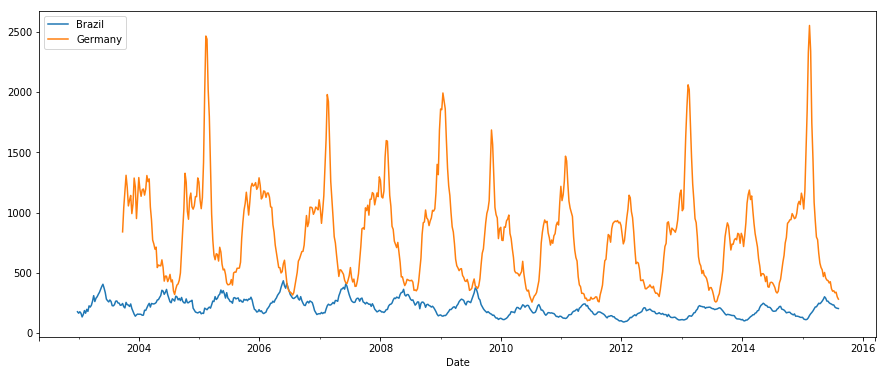

In [6]:
#Plot of flutrend for Germany; 
%matplotlib inline
ax = brazilFluTrends.plot(legend ='left', x='Date', y = 'Brazil', figsize=(15, 6), grid=True)
germanyFluTrends.plot(x='Date', y = 'Germany' , ax=ax)

### Plot for regions within the germanyFluTrends dataset.

Text(0.5,0,u'Year')

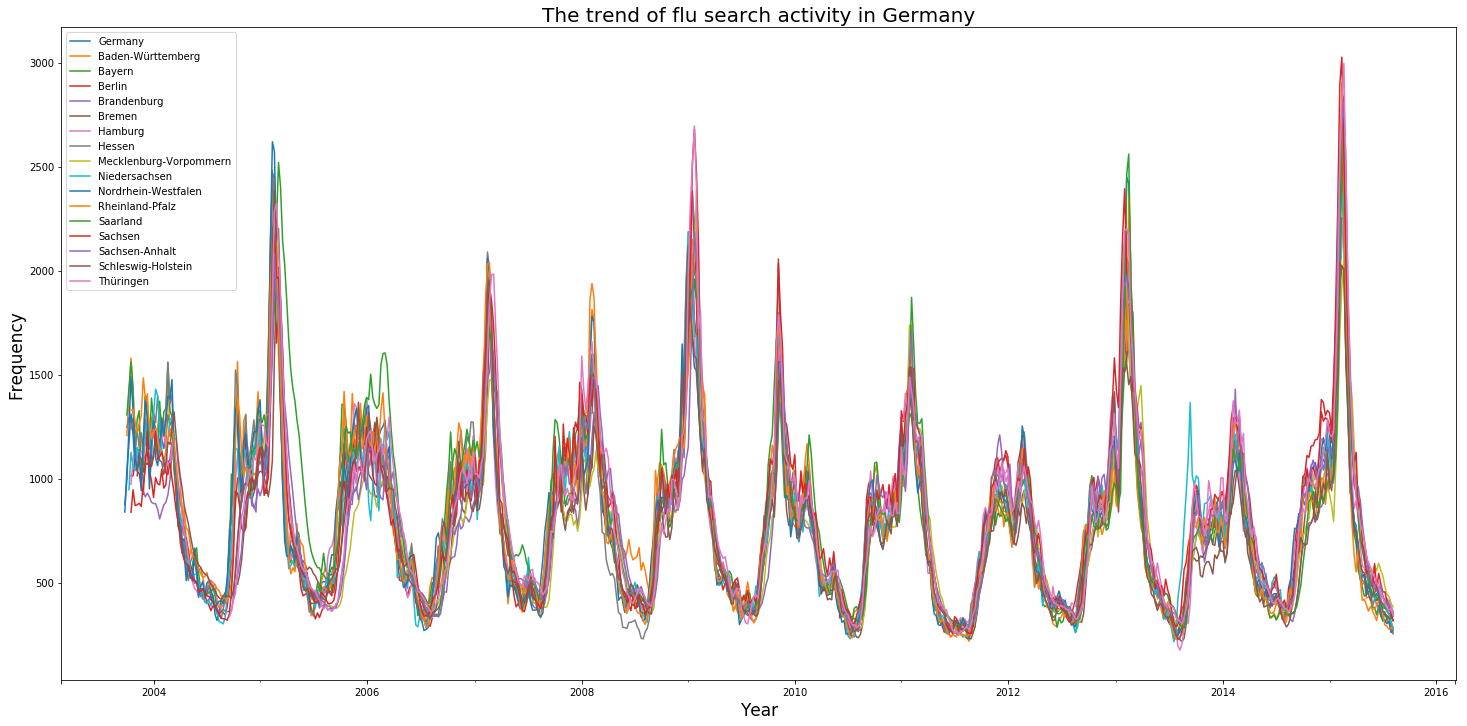

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig_de = germanyFluTrends.plot(x='Date', figsize=(25,12))
fig_de.set_title('The trend of flu search activity in Germany',fontsize=20)
fig_de.set_ylabel('Frequency',fontsize=17)
fig_de.set_xlabel('Year',fontsize=17)

### Plot for regions within the brazilFluTrends dataset.

Text(0.5,0,u'Year')

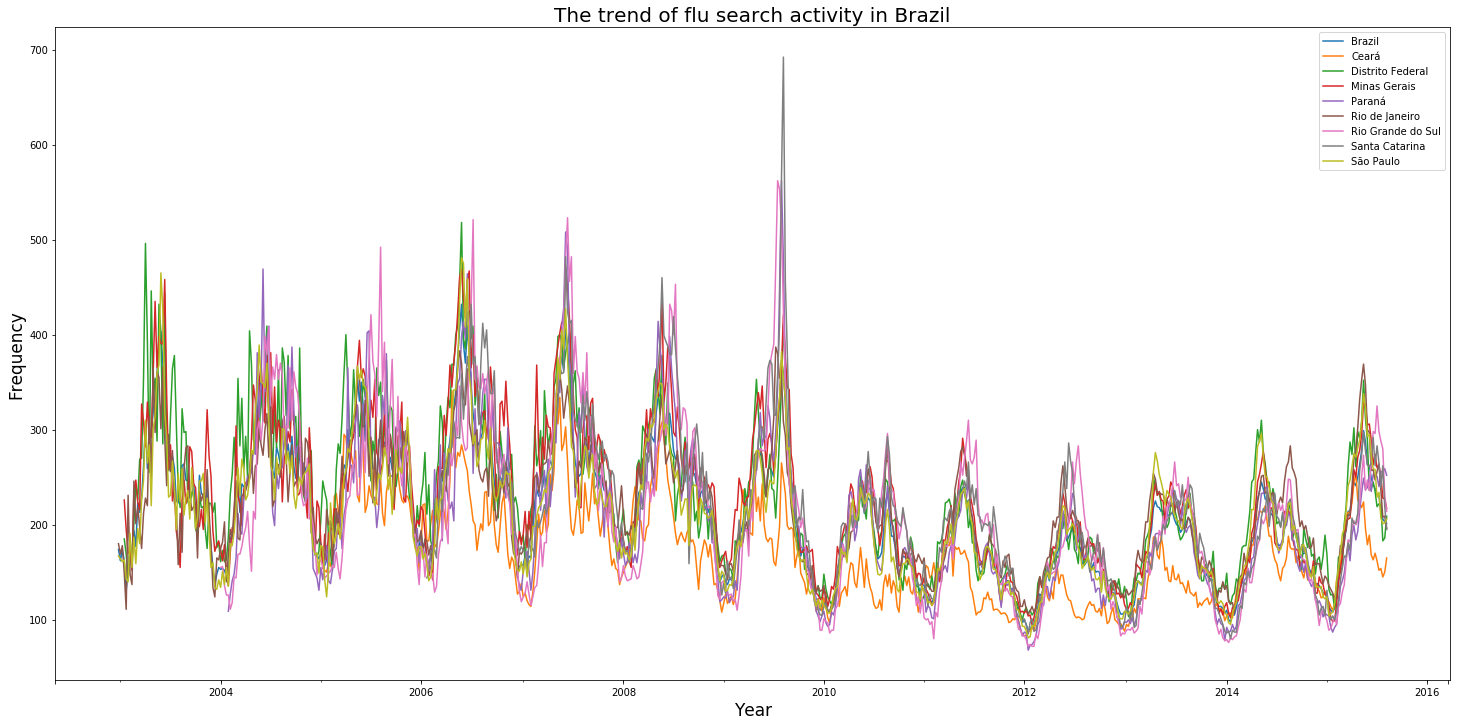

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig_br = brazilFluTrends.plot(x='Date', figsize=(25,12))
fig_br.set_title('The trend of flu search activity in Brazil',fontsize=20)
fig_br.set_ylabel('Frequency',fontsize=17)
fig_br.set_xlabel('Year',fontsize=17)

In [9]:
#

In [10]:
#

## 2/.  Calculate the yearly minimum and maximum for each country.  Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country.

### Investigating the min, mean and max flutrend values for Germany and Brazil.

In [11]:
# Yearly minimum and maximum flutrend values for Germany from September 2003 to August 2015.
df_de_year = germanyFluTrends['Year'] = germanyFluTrends['Date'].dt.year
df_de_month = germanyFluTrends['Month'] = germanyFluTrends['Date'].dt.month
df_de = germanyFluTrends.groupby(['Year'])
#df_de_nan = df_de["Germany"].fillna(df["Germany"].mean(), inplace=True)
df_min_max = df_de.agg({'Germany' : [np.min, np.mean, np.max]})
df_fill = df_min_max.fillna(0)
df1 = df_fill.astype(int)

In [12]:
#Yearly minimum and maximum flutrends for Brazil from December 2002 to November 2015.
df_br_year = brazilFluTrends['Year'] = brazilFluTrends['Date'].dt.year
df_br_month = brazilFluTrends['Month'] = brazilFluTrends['Date'].dt.month
df_br = brazilFluTrends.groupby(['Year'])
df2 = df_br.agg({'Brazil' : [np.min, np.mean, np.max]})
df2 = df2.astype(int)

In [13]:
# Joining of the df1 and df2 dataframes.
df_all = df1.join(df2)
df_all

Germany             Brazil          
        amin  mean  amax   amin mean amax
Year                                     
2003     839  1107  1310    131  238  403
2004     318   824  1327    145  249  360
2005     396   948  2469    157  254  355
2006     313   791  1289    151  263  432
2007     385   869  1982    157  256  406
2008     348   838  1685    140  243  361
2009     352   874  1995    110  211  373
2010     254   653  1076    109  172  234
2011     256   667  1469     97  160  239
2012     301   678  1187     89  145  208
2013     255   787  2063    106  166  225
2014     330   731  1187     98  170  245
2015     279   889  2557    108  206  299

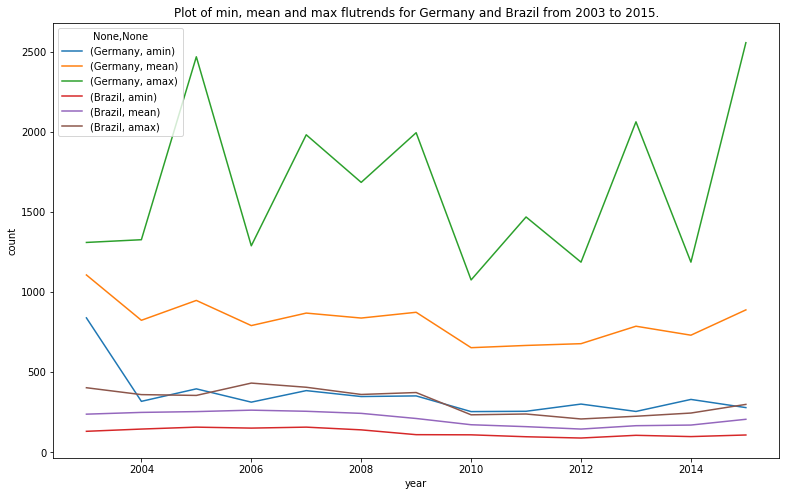

In [14]:
# Plot of min, mean and max flutrends for Germany and Brazil from 2003 to 2015.
df_all.plot()
plt.title('Plot of min, mean and max flutrends for Germany and Brazil from 2003 to 2015.')
plt.xlabel('year')
plt.ylabel('count')
plt.gcf().set_size_inches(13,8)

In [15]:
#

In [16]:
#

### Time series analysis.

### Germany

In [17]:
# Germany; Log of the seasonal flutrends for germanyFluTrends.
de_log = [np.log(x) for x in germanyFluTrends['Germany']]

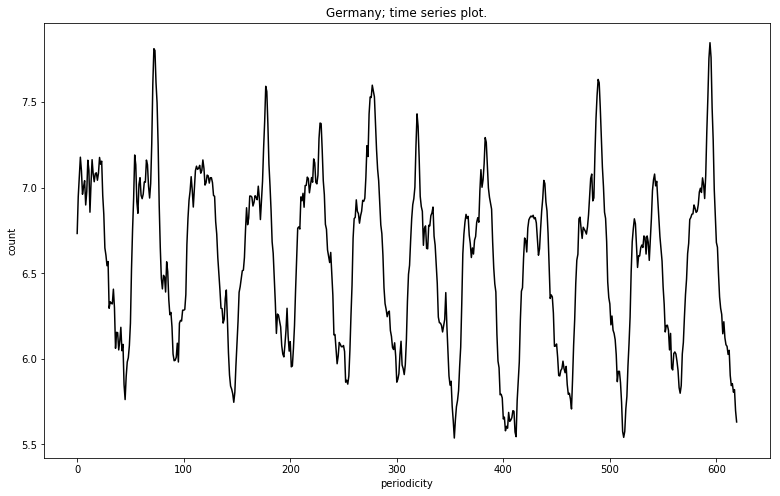

In [18]:
# Germany; time series plot.
plt.plot(de_log, color='black')
plt.title('Germany; time series plot.')
plt.xlabel('periodicity')
plt.ylabel('count')
plt.gcf().set_size_inches(13,8)

/Users/db/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


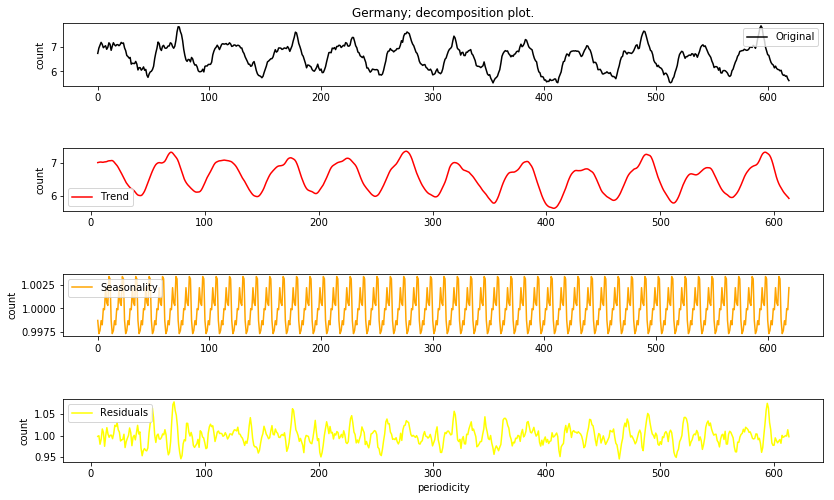

In [19]:
# Germany; Decomposition plot by periodicity and count.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(de_log, model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(de_log, label='Original', color='black')
plt.legend(loc='best')
plt.title('Germany; decomposition plot.')
plt.ylabel('count')

plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='best')
plt.ylabel('count')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='orange')
plt.legend(loc='best')
plt.ylabel('count')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='yellow')
plt.legend(loc='best')
plt.xlabel('periodicity')
plt.ylabel('count')

plt.tight_layout()
plt.gcf().set_size_inches(13,8)

In [20]:
#

### Brazil

In [21]:
# Brazil; Log of the seasonal flutrends for brazilFluTrends.
br_log = [np.log(x) for x in brazilFluTrends['Brazil']]

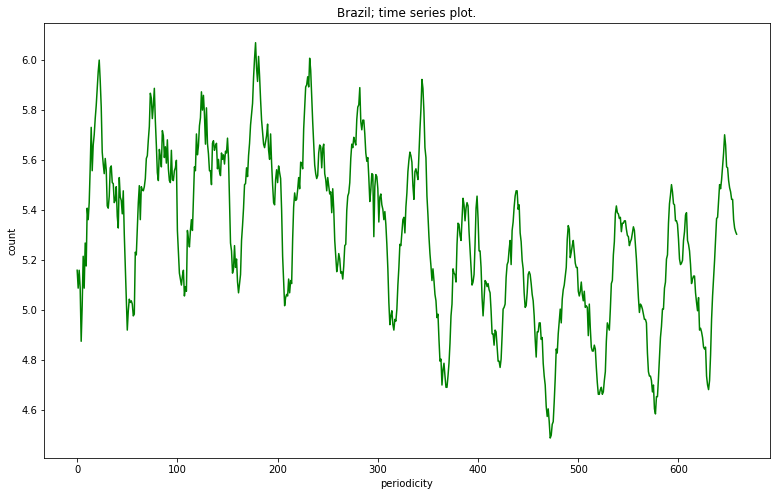

In [22]:
# Brazil; time series plot.
plt.plot(br_log, color='green')
plt.title('Brazil; time series plot.')
plt.xlabel('periodicity')
plt.ylabel('count')
plt.gcf().set_size_inches(13,8)

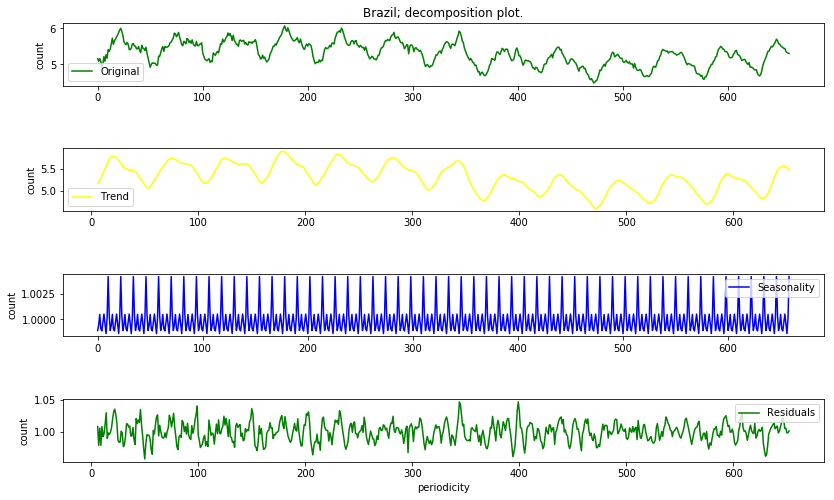

In [23]:
# Brazil; Decomposition plot by periodicity and count.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(br_log, model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(br_log, label='Original', color='green')
plt.legend(loc='best')
plt.title('Brazil; decomposition plot.')
plt.ylabel('count')

plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='best')
plt.ylabel('count')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.ylabel('count')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='green')
plt.legend(loc='best')
plt.xlabel('periodicity')
plt.ylabel('count')

plt.tight_layout()
plt.gcf().set_size_inches(13,8)

In [24]:
#

### Pivot tabulations for Germany and Brazil showing mean values.

### Germany

In [25]:
# Germany; Pivot tabulation of mean values separated by year and month.
df_germany_pivot_mean = germanyFluTrends.pivot_table(index=['Year', 'Month'], aggfunc='mean')
df_germany_pivot_mean

Baden-Württemberg   Bayern   Berlin  Brandenburg   Bremen  \
Year Month                                                              
2003 9                    NaN      NaN      NaN          NaN      NaN   
     10               1405.50  1432.75  1013.00          NaN      NaN   
     11               1193.40  1160.00  1005.60       939.00      NaN   
     12               1297.75  1308.50  1064.00       910.00      NaN   
2004 1                1265.50  1251.50   964.75       854.25      NaN   
     2                1281.80  1346.60  1027.20       902.40      NaN   
     3                1034.50  1023.50  1021.50      1076.75      NaN   
     4                 776.75   747.25   737.75       789.25      NaN   
     5                 630.40   601.60   560.20       536.20      NaN   
     6                 530.00   474.75   457.75       434.50      NaN   
     7                 469.75   456.50   388.75       411.50      NaN   
     8                 410.60   398.60   361.00       370.60      NaN   
     9                 605.25   629.25   455.50       362.50      NaN   
     10               1195.40  1178.00   906.00       685.20   546.00   
     11               1186.25  1097.25  1092.75       990.00   870.50   
     12               1254.25  1170.00   993.50       908.50   954.75   
2005 1                1199.80  1281.40  1080.80      1068.40   990.60   
     2                2282.75  2215.25  1779.75      1915.75  1399.50   
     3                1169.50  1267.25  1279.75      1461.75  1694.50   
     4                 698.00   652.25   637.50       802.00   920.75   
     5                 611.20   638.20   541.80       570.80   620.60   
     6                 411.50   425.50   422.00       490.75   572.50   
     7                 423.00   459.80   345.80       423.60   509.80   
     8                 534.75   563.25   435.50       387.50   455.00   
     9                 692.50   658.25   550.00       386.75   496.25   
     10               1144.80  1230.60   951.20       635.60   769.60   
     11               1263.75  1166.75  1079.25       940.00   923.75   
     12               1274.50  1261.00  1180.25      1069.00  1031.25   
2006 1                1180.80  1228.80  1169.20      1084.00  1013.60   
     2                1155.50  1146.00  1064.50      1108.25   953.25   
...                       ...      ...      ...          ...      ...   
2013 3                1077.60  1041.20  1226.20      1321.60  1296.20   
     4                 589.00   598.50   725.00       846.00   669.75   
     5                 497.50   479.00   479.25       501.00   418.75   
     6                 373.00   377.20   391.20       406.60   377.80   
     7                 300.75   302.50   268.75       304.00   282.75   
     8                 274.50   300.50   386.00       290.25   227.00   
     9                 545.60   592.80   720.80       517.80   499.40   
     10                827.00   855.75   793.00       712.25   614.75   
     11                738.00   700.00   767.25       679.00   681.75   
     12                795.40   759.20   834.80       776.80   689.80   
2014 1                 813.50   814.50   966.25       827.00   674.25   
     2                1143.50  1113.25  1314.75      1174.50   940.50   
     3                 932.40   868.20  1023.20      1031.00   864.60   
     4                 536.25   555.00   693.00       667.25   554.00   
     5                 440.75   443.25   539.75       489.00   479.25   
     6                 366.60   368.80   474.00       400.80   447.60   
     7                 351.75   345.00   408.75       405.00   430.25   
     8                 370.40   403.40   453.40       344.00   357.60   
     9                 602.75   642.50   777.50       462.75   464.75   
     10                915.00   978.00  1061.00       724.25   858.50   
     11                895.60   854.80  1181.20       817.00   866.00   
     12               1040.50   988.75  1344.25       936.50   926.25 

In [26]:
# Germany; Log of the mean seasonal flutrends for germanyFluTrends.
de_log_mean = [np.log(x) for x in df_germany_pivot_mean['Germany']]

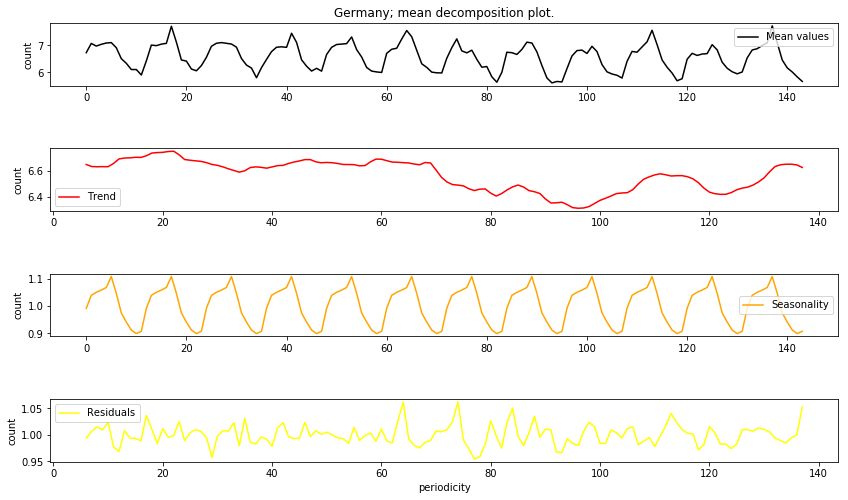

In [27]:
# Germany; Decomposition plot by periodicity and count.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(de_log_mean, model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(de_log_mean, label='Mean values', color='black')
plt.legend(loc='best')
plt.title('Germany; mean decomposition plot.')
plt.ylabel('count')

plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='best')
plt.ylabel('count')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='orange')
plt.legend(loc='best')
plt.ylabel('count')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='yellow')
plt.legend(loc='best')
plt.xlabel('periodicity')
plt.ylabel('count')

plt.tight_layout()
plt.gcf().set_size_inches(13,8)

In [28]:
#

### Brazil

In [29]:
# Brazil; Pivot tabulation of mean values separated by year and month.
df_brazil_pivot_mean = brazilFluTrends.pivot_table(index=['Year', 'Month'], aggfunc='mean')
df_brazil_pivot_mean

Brazil       Ceará  Distrito Federal  Minas Gerais  Paraná  \
Year Month                                                               
2002 12     174.00         NaN               NaN           NaN     NaN   
2003 1      157.25         NaN            177.00        210.50     NaN   
     2      172.75         NaN            167.25        182.00     NaN   
     3      220.60         NaN            272.20        264.60     NaN   
     4      288.25         NaN            397.50        299.75     NaN   
     5      350.25         NaN            352.50        389.25     NaN   
     6      330.60         NaN            331.20        366.80     NaN   
     7      253.25         NaN            340.50        235.00     NaN   
     8      246.00         NaN            274.00        206.00     NaN   
     9      236.75         NaN            227.50        258.50     NaN   
     10     226.75         NaN            208.50        212.75     NaN   
     11     213.00         NaN            206.80        260.20     NaN   
     12     148.50         NaN            198.25        181.75     NaN   
2004 1      151.00         NaN            164.50        164.75     NaN   
     2      190.40         NaN            243.20        200.00  138.00   
     3      235.00         NaN            307.00        222.00  205.50   
     4      251.25         NaN            328.50        257.50  248.25   
     5      315.20         NaN            296.40        335.60  318.40   
     6      332.75         NaN            350.25        334.50  403.50   
     7      268.75         NaN            288.50        327.25  235.50   
     8      282.40         NaN            339.40        276.20  264.80   
     9      276.50         NaN            331.00        309.50  346.00   
     10     255.20         NaN            289.40        243.00  271.60   
     11     248.75         NaN            252.00        250.75  229.00   
     12     173.00         NaN            173.00        203.00  144.50   
2005 1      164.80  154.333333            219.80        175.80  155.20   
     2      199.00  197.250000            194.75        205.75  159.50   
     3      228.00  233.750000            307.75        228.50  200.75   
     4      280.25  278.500000            336.00        258.00  278.25   
     5      333.00  261.800000            324.80        343.80  283.40   
...            ...         ...               ...           ...     ...   
2013 3      160.60  132.200000            178.20        166.60  144.60   
     4      214.25  176.250000            231.75        226.75  182.00   
     5      212.50  169.750000            216.50        222.25  195.25   
     6      209.80  147.200000            211.20        231.40  223.80   
     7      196.50  141.750000            193.00        219.25  217.25   
     8      202.50  133.000000            215.75        226.75  196.25   
     9      169.40  122.400000            183.00        187.60  163.80   
     10     149.50  119.500000            147.25        153.00  147.50   
     11     138.00  119.750000            151.75        145.75  122.75   
     12     112.60  109.600000            132.60        112.20   92.80   
2014 1      103.25  105.000000            127.75        110.00   90.50   
     2      118.50  130.250000            142.75        121.25  103.50   
     3      153.00  155.800000            188.20        154.20  142.40   
     4      201.00  192.000000            267.00        213.25  180.00   
     5      236.25  215.500000            284.25        263.00  229.50   
     6      211.20  182.800000            236.00        213.40  221.00   
     7      180.00  150.500000            203.00        177.50  179.75   
     8      206.20  172.000000            207.60        207.40  201.60   
     9      181.00  165.750000            180.25        170.50  164.75   
     10     166.75  148.250000            177.75        156.00  153.75   
     11     146.40  143.400000            166.80        142.80  130.40   
     12     131.

In [30]:
# Brazil; Log of the mean seasonal flutrends for brazilFluTrends.
br_log_mean = [np.log(x) for x in df_brazil_pivot_mean['Brazil']]

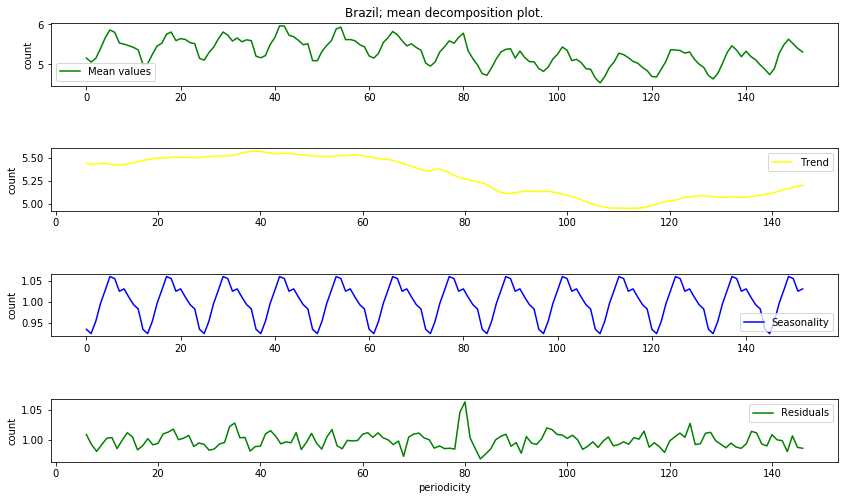

In [31]:
# Brazil; Decomposition plot by periodicity and count.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(br_log_mean, model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(br_log_mean, label='Mean values', color='green')
plt.legend(loc='best')
plt.title('Brazil; mean decomposition plot.')
plt.ylabel('count')

plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='best')
plt.ylabel('count')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.ylabel('count')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='green')
plt.legend(loc='best')
plt.xlabel('periodicity')
plt.ylabel('count')

plt.tight_layout()
plt.gcf().set_size_inches(13,8)

In [32]:
#